In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob

setGPU: Setting GPU to: 0


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [42]:
from scipy.stats import skew

In [41]:
from scipy.stats import kurtosis

In [2]:
def loadModel(name, weights=False):
    '''
    Adapted from Kaustuv Datta and Jayesh Mahapatra's CaloImageMacros.
    Loads models from json file.
    :parameter name: name of the json file.
    :type name: str
    :parameter weights: whether or not to load the weights.
    :type weights: bool
    :return: loaded model.
    '''
    from keras.models import model_from_json
    json_file = open('%s' % name, 'r')
    loaded = json_file.read()
    json_file.close()

    model = model_from_json(loaded)

    # load weights into new model
    if weights == True:
        model.load_weights('%s.h5' % name)
    # print(model.summary())

    #print("Loaded model from disk")
    return model

In [3]:
latent_space=100
batch_size=128

noise = np.random.normal(0, 1, (batch_size, latent_space))

In [4]:
def getMetric(all_g_weight, gen_model):
    g = loadModel(gen_model)

    means = []
    stds = []
    epochs = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]

        g.load_weights(w)
        generated_images = g.predict(noise)
        generated_images = generated_images.squeeze()

        means.append(np.mean(generated_images))
        stds.append(np.std(generated_images))
        epochs.append(int(epoch))
    
    return means, stds, epochs

In [5]:
#all_g_weight1 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/weights/generator_weights_epoch_*.h5'
#gen_model1 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/weights/generator_modeltrial2.json'

In [9]:
all_g_weight2 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_weights_epoch_*.h5'
gen_model2 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_modeltrial3_bs_128.json'

In [8]:
#all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial22/weights/generator_weights_epoch_*.h5'
#gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial22/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [5]:
all_g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [6]:
means1, stds1, epochs1 = getMetric(all_g_weight1, gen_model1)

Using TensorFlow backend.


In [10]:
means2, stds2, epochs2 = getMetric(all_g_weight2, gen_model2)

In [11]:
def sortMeans(epochs, means):
    epoch_mean = np.array([np.asarray(epochs), np.asarray(means)])
    epoch_mean_sorted = (epoch_mean.T)[np.argsort(epoch_mean[0])]
    return epoch_mean_sorted

In [12]:
epoch_mean_sorted1 = sortMeans(epochs1, means1)

In [13]:
epoch_mean_sorted2 = sortMeans(epochs2, means2)

In [143]:
def plotMean(epoch_mean_sorted):
    plt.scatter(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], alpha=0.6, color='blue')
    plt.title("Mean energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\mu$ (GeV)", size=16)
    #plt.xlim(-50, 1000)
    ## ACTIVATE YLIM
    #plt.ylim(0, 0.05)
    #plt.savefig("means.png")
    plt.errorbar(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], yerr=np.std(epoch_mean_sorted[:,1])/np.sqrt(len(epoch_mean_sorted[:,1])), color='orange', alpha = 0.3, fmt='o')

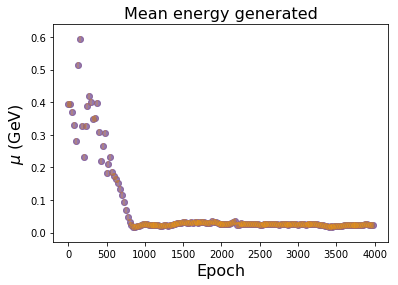

In [144]:
plotMean(epoch_mean_sorted1)

In [17]:
def plotMeans(epoch_mean_sorted1, epoch_mean_sorted2):
    plt.scatter(epoch_mean_sorted1[:,0], epoch_mean_sorted1[:,1], label="first")
    plt.scatter(epoch_mean_sorted2[:,0], epoch_mean_sorted2[:,1], label="second")
    plt.title("Mean energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\mu$ (GeV)", size=16)
    #plt.xlim(-50, 1000)
    #plt.ylim(0, 1.5)
    plt.legend()
    #plt.savefig("means.png")
    #plt.errorbar(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], yerr=np.std(epoch_mean_sorted[:,1])/np.sqrt(len(epoch_mean_sorted[:,1])), color='grey', alpha = 0.5, fmt='o')

In [45]:
#plotMeans(epoch_mean_sorted1, epoch_mean_sorted2)

In [19]:
## No need to execute this again
#f = h5py.File('/bigdata/shared/HGCAL_data/new/all_noPU.h5', 'r')
#X = np.asarray(f['X'])
#X = X.squeeze()

In [20]:
## Should aim for:
#np.mean(X) = 0.02

In [113]:
def plotStd(epochs, stds):
    plt.scatter(epochs, stds, alpha=0.5, color='green')
    plt.title("Standard deviation of energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\sigma$ (GeV)", size=16)
    #plt.xlim(-50, 1000)
    plt.ylim(0, 0.5)
    #plt.savefig("stds.png")

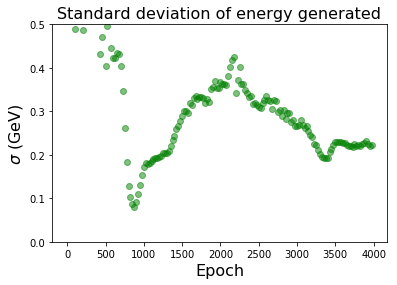

In [114]:
plotStd(epochs1, stds1)

In [24]:
def plotStds(epochs1, stds1, epochs2, stds2):
    plt.scatter(epochs1, stds1, label="first")
    plt.scatter(epochs2, stds2, label="second")
    plt.title("Standard deviation of energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\sigma$ (GeV)", size=16)
    plt.xlim(-50, 1000)
    #plt.ylim(0, 1)
    plt.legend()
    #plt.savefig("stds.png")

In [44]:
#plotStds(epochs1, stds1, epochs2, stds2)

In [42]:
## Aim for:
#np.std(X) = 0.36

In [66]:
def getMetric(all_g_weight, gen_model):
    g = loadModel(gen_model)

    means = []
    stds = []
    epochs = []
    variances = []
    skews = []
    kurtoses = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]

        g.load_weights(w)
        generated_images = g.predict(noise)
        #generated_images = generated_images.squeeze()

        means.append(np.mean(generated_images))
        stds.append(np.std(generated_images))
        epochs.append(int(epoch))
        variances.append(np.var(generated_images))
        skews.append(skew(generated_images, axis=None))
        kurtoses.append(kurtosis(generated_images, axis=None))
    
    return means, stds, epochs, variances, skews, kurtoses

In [67]:
means1, stds1, epochs1, vars1, skews1, kurtoses1 = getMetric(all_g_weight1, gen_model1)

In [109]:
def plotVar(epochs, variances):
    plt.scatter(epochs, variances, alpha=0.5, color='green')
    plt.title("Variance of sample generated per epoch", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("Var", size=16)
    #plt.xlim(-50, 1000)
    #plt.ylim(0, 0.5)
    #plt.savefig("stds.png")

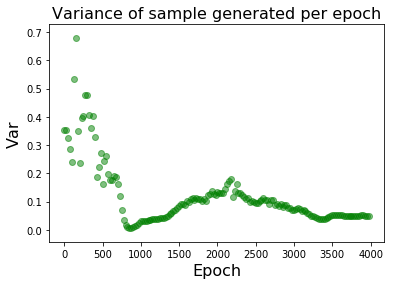

In [110]:
plotVar(epochs1, vars1)

In [105]:
def plotSkew(epochs, skews):
    plt.scatter(epochs, skews, alpha=0.5, color='green')
    plt.title("Third moment of sample generated per epoch", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("Skew", size=16)
    #plt.xlim(-50, 1000)
    #plt.ylim(0, 0.5)
    #plt.savefig("stds.png")

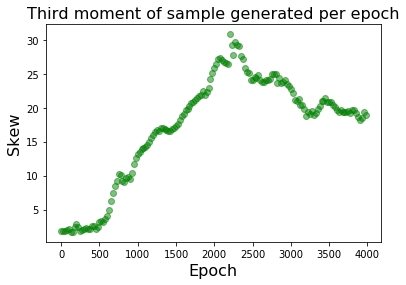

In [106]:
plotSkew(epochs1, skews1)

In [111]:
def plotKurtoses(epochs, kurtoses):
    plt.scatter(epochs, kurtoses, alpha=0.5, color='green')
    plt.title("Fourth moment of sample generated per epoch", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("Kurtosis", size=16)
    #plt.xlim(-50, 1000)
    #plt.ylim(0, 0.5)
    #plt.savefig("stds.png")

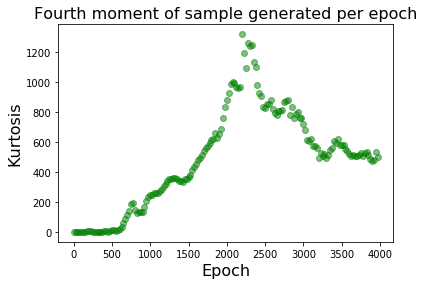

In [112]:
plotKurtoses(epochs1, kurtoses1)

# ------------ STOP EXECUTING HERE ------------------

In [68]:
f = h5py.File('/bigdata/shared/HGCAL_data/new/all_noPU.h5', 'r')
X = np.asarray(f['X'])
X = X.squeeze()

In [69]:
X.shape

(195386, 16, 16, 55)

In [72]:
np.mean(X)

0.02276984

In [71]:
np.var(X)

0.12619433

In [73]:
np.std(X)

0.3552384

In [74]:
skew(X, axis=None)

34.635719299316406

In [75]:
kurtosis(X, axis=None)

1764.2194336137854